## Day 15: Dueling Generators

Here, you encounter a pair of dueling generators. The generators, called **generator A** and **generator B**, are trying to agree on a sequence of numbers. However, one of them is malfunctioning, and so the sequences don't always match.

### Part One

As they do this, a judge waits for each of them to generate its next value, compares the lowest 16 bits of both values, and keeps track of the number of times those parts of the values match.

The generators both work on the same principle. To create its next value, a generator will take the previous value it produced, multiply it by a factor (generator A uses 16807; generator B uses 48271), and then keep the remainder of dividing that resulting product by 2147483647. That final remainder is the value it produces next.

In [9]:
MAGIC_NUMBER = 2147483647

class Generator:
    
    def __init__(self, factor, value=1):
        self.factor = factor
        self.value = value
        
    def __iter__(self): return self
    
    def __next__(self):
        self.value = self.value * self.factor % MAGIC_NUMBER
        return self.value
        
a = Generator(16807)
b = Generator(48271)

counter = 0
for i, j in zip(a, b):
    print(i, j)
    counter += 1
    if counter > 10:
        break


16807 48271
282475249 182605794
1622650073 1291394886
984943658 1914720637
1144108930 2078669041
470211272 407355683
101027544 1105902161
1457850878 854716505
1458777923 564586691
2007237709 1596680831
823564440 192302371


To calculate each generator's first value, it instead uses a specific starting value as its "previous value" (as listed in your puzzle input).

For example, suppose that for starting values, generator A uses 65, while generator B uses 8921. Then, the first five pairs of generated values are:

    --Gen. A--  --Gen. B--
       1092455   430625591
    1181022009  1233683848
     245556042  1431495498
    1744312007   137874439
    1352636452   285222916


In [10]:
def first(max_count, seq):
    '''Return the first `max_count` elements of a sequence or generator
    '''
    assert max_count > 0
    counter = 0
    for item in seq:
        yield item
        counter += 1
        if counter >= max_count:
            break
        
list(first(5, range(10))) == [0, 1, 2, 3, 4]

True

In [11]:
gen_a = Generator(16807, 65)
gen_b = Generator(48271, 8921)

print('    --Gen. A--  --Gen. B--')
for (a, b) in first(5, zip(gen_a, gen_b)):
    print('    {:10}  {:10}'.format(a, b))


    --Gen. A--  --Gen. B--
       1092455   430625591
    1181022009  1233683848
     245556042  1431495498
    1744312007   137874439
    1352636452   285222916


In binary, these pairs are (with generator A's value first in each pair):

    00000000000100001010101101100111
    00011001101010101101001100110111

    01000110011001001111011100111001
    01001001100010001000010110001000

    00001110101000101110001101001010
    01010101010100101110001101001010

    01100111111110000001011011000111
    00001000001101111100110000000111

    01010000100111111001100000100100
    00010001000000000010100000000100


In [12]:
def to_bin(h, size=32):
    s = bin(h)[2:]  # remove the binary prefix
    if len(s) < size:
        s = '0' * (size-len(s)) + s
    return s

assert to_bin(15, size=16) == '0000000000001111'

In [14]:
gen_a = Generator(16807, 65)
gen_b = Generator(48271, 8921)

print('-------------Gen. A-------------  ------------Gen. B--------------')
for a, b in first(5, zip(gen_a, gen_b)):
    print('{}  {}'.format(
        to_bin(a),
        to_bin(b),
        ))

-------------Gen. A-------------  ------------Gen. B--------------
00000000000100001010101101100111  00011001101010101101001100110111
01000110011001001111011100111001  01001001100010001000010110001000
00001110101000101110001101001010  01010101010100101110001101001010
01100111111110000001011011000111  00001000001101111100110000000111
01010000100111111001100000100100  00010001000000000010100000000100


Here, you can see that the lowest (here, rightmost) 16 bits of the third value match: 1110001101001010. Because of this one match, after processing these five pairs, the judge would have added only 1 to its total.



In [15]:
def check(n1, n2): return n1[-16:] == n2[-16:]

In [16]:
gen_a = Generator(16807, 65)
gen_b = Generator(48271, 8921)

print('-------------Gen. A-------------  ------------Gen. B--------------  -chk-')
for a, b in first(5, zip(gen_a, gen_b)):
    s1 = to_bin(a)
    s2 = to_bin(b)
    print('{}  {}  {:^5}'.format(s1, s2, '✓' if check(s1, s2) else ''))

-------------Gen. A-------------  ------------Gen. B--------------  -chk-
00000000000100001010101101100111  00011001101010101101001100110111       
01000110011001001111011100111001  01001001100010001000010110001000       
00001110101000101110001101001010  01010101010100101110001101001010    ✓  
01100111111110000001011011000111  00001000001101111100110000000111       
01010000100111111001100000100100  00010001000000000010100000000100       


To get a significant sample, the judge would like to consider 40 million pairs. (In the example above, the judge would eventually find a total of 588 pairs that match in their lowest 16 bits.)

In [20]:
gen_a = Generator(16807, 65)
gen_b = Generator(48271, 8921)

counter = 0
for a, b in first(40000000, zip(gen_a, gen_b)):
    s1 = to_bin(a)
    s2 = to_bin(b)
    if check(s1, s2):
        counter += 1

assert counter == 588
print('ok')

ok


After 40 million pairs, **what is the judge's final count?**

- Generator A starts with 783
- Generator B starts with 325

In [21]:
gen_a = Generator(16807, 783)
gen_b = Generator(48271, 325)

counter = 0
for a, b in first(40000000, zip(gen_a, gen_b)):
    s1 = to_bin(a)
    s2 = to_bin(b)
    if check(s1, s2):
        counter += 1
        
print('Part one:', counter)

Part one: 650


### Part Two

In the interest of trying to align a little better, the generators get more picky
about the numbers they actually give to the judge.

They still generate values in the same way, but now they only hand a value to 
the judge when it meets their criteria:

    Generator A looks for values that are multiples of 4.
    Generator B looks for values that are multiples of 8.

Each generator functions completely independently: they both go through values
entirely on their own, only occasionally handing an acceptable value to 
the judge, and otherwise working through the same sequence of values as before
until they find one.

The judge still waits for each generator to provide it with a value before comparing
them (using the same comparison method as before). It keeps track of the order
it receives values; the first values from each generator are compared, then
the second values from each generator, then the third values, and so on.

Using the example starting values given above, the generators now produce 
the following first five values each:

    --Gen. A--  --Gen. B--
    1352636452  1233683848
    1992081072   862516352
     530830436  1159784568
    1980017072  1616057672
     740335192   412269392


In [22]:
class FilteredGenerator(Generator):
    
    def __init__(self, factor, value=1, filter_=None):
        self.factor = factor
        self.value = value
        self.filter_ = filter_ if filter_ else lambda x: True
    
    def __next__(self):
        self.value = self.value * self.factor % MAGIC_NUMBER
        while not self.filter_(self.value):
            self.value = self.value * self.factor % MAGIC_NUMBER
        return self.value

In [23]:
gen_a = FilteredGenerator(16807, 65, lambda x: x % 4 == 0)
gen_b = FilteredGenerator(48271, 8921, lambda x: x % 8 == 0)

print('---Gen. A---  ---Gen. B---')
for (a,b) in first(5, (zip(gen_a, gen_b))):
    print('{:12}  {:12}'.format(a, b))
    

---Gen. A---  ---Gen. B---
  1352636452    1233683848
  1992081072     862516352
   530830436    1159784568
  1980017072    1616057672
   740335192     412269392


These values have the following corresponding binary values:

    01010000100111111001100000100100
    01001001100010001000010110001000

    01110110101111001011111010110000
    00110011011010001111010010000000

    00011111101000111101010001100100
    01000101001000001110100001111000

    01110110000001001010100110110000
    01100000010100110001010101001000

    00101100001000001001111001011000
    00011000100100101011101101010000

Unfortunately, even though this change makes more bits similar on average, none of these values' lowest 16 bits match. Now, it's not until the 1056th pair that the judge finds the first match:

    --Gen. A--  --Gen. B--
    1023762912   896885216

    00111101000001010110000111100000
    00110101011101010110000111100000

This change makes the generators much slower, and the judge is getting impatient; it is now only willing to consider 5 million pairs. (Using the values from the example above, after five million pairs, the judge would eventually find a total of 309 pairs that match in their lowest 16 bits.)

In [24]:
gen_a = FilteredGenerator(16807, 65, lambda x: x % 4 == 0)
gen_b = FilteredGenerator(48271, 8921, lambda x: x % 8 == 0)

counter = 0
for a, b in first(5000000, zip(gen_a, gen_b)):
    s1 = to_bin(a)
    s2 = to_bin(b)
    if check(s1, s2):
        counter += 1

assert counter == 309
print('ok')

ok


After 5 million pairs, but using this new generator logic, **what is the judge's final count?**

In [25]:
gen_a = FilteredGenerator(16807, 783, lambda x: x % 4 == 0)
gen_b = FilteredGenerator(48271, 325, lambda x: x % 8 == 0)

counter = 0
for a, b in first(5000000, zip(gen_a, gen_b)):
    s1 = to_bin(a)
    s2 = to_bin(b)
    if check(s1, s2):
        counter += 1
        
print('Part two:', counter)

Part two: 336


### Extra

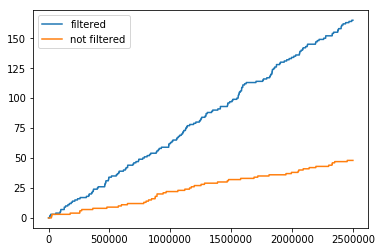

In [27]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot  as plt

NUM_TRIES = 2500000

v_to_bin = np.vectorize(to_bin)
v_check = np.vectorize(check)

gen_a = Generator(16807, 783)
gen_b = Generator(48271, 325)
sa = v_to_bin(np.array([_ for _ in first(NUM_TRIES, gen_a)]))
sb = v_to_bin(np.array([_ for _ in first(NUM_TRIES, gen_b)]))
unfiltered_hits = v_check(sa, sb)

gen_a = FilteredGenerator(16807, 783, lambda x: x % 4 == 0)
gen_b = FilteredGenerator(48271, 325, lambda x: x % 8 == 0)
sa = v_to_bin(np.array([_ for _ in first(NUM_TRIES, gen_a)]))
sb = v_to_bin(np.array([_ for _ in first(NUM_TRIES, gen_b)]))
filtered_hits = v_check(sa, sb)

graph_1, = plt.plot(np.add.accumulate(filtered_hits), label='filtered')
graph_2, = plt.plot(np.add.accumulate(unfiltered_hits), label='not filtered')

plt.legend(handles=[graph_1, graph_2]);